# Disciplina: Ciência de Dados (DCA-0131)
Prof. Luiz Affonso Guedes

### Departamento de Engenharia de Computação e Automação - DCA

UFRN - 2025

*OBS: Favor fazer cópia do notebook antes de alterá-lo.

## Aula 9 - Modelos Estatísticos


- Apresentar como usar as distribuições estatísticas no pacote SciPy-Python e obter suas medidas estatísticas.

- Exemplos de aplicação.

## 1. Introdução às Distribuições Estatísticas com o Pacote SciPy

- Como gerar números aleatórios?
- O pacote stats do SciPy fornece uma gama de classes e métodos para se trabalhar com distribuições estatísitcas discretas e contínuas.
- Importação do pacote
    - from scipy import stats

In [1]:
# Importação do Pacote

from scipy import stats


In [2]:
# Geração de um número randômico seguindo uma distribuição normal de média ZERO e desvio padrão 1.
stats.norm.rvs()

np.float64(-1.0876939241911607)

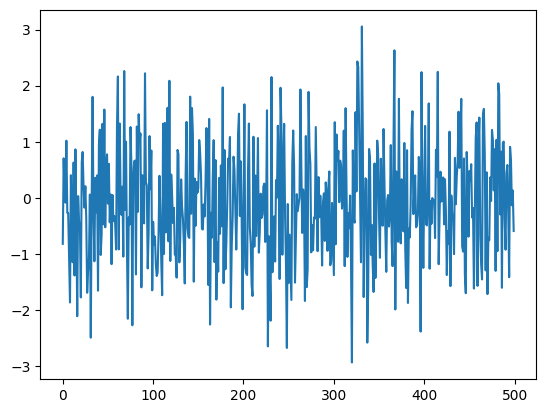

In [3]:
# Assinatura padrão para geração de números aleatórios seguindo distribuição normal
# .norm,  --> é a classe de distribuição normal
# .rvs()  --> método que gera os números aleatórios
# variável loc é a média no caso da distribuição normal
# variável scale é o desvio padrão no caso da distribuição normal
# variável size é o número de amostras geradas
# variável random_state é para geração da semente dos números
import matplotlib.pyplot as plt
import numpy as np

size = 100000
x = stats.norm.rvs(loc=0, scale=1, size=size, random_state=None)
#plt.plot(x)
plt.plot(x[:500]) # Para de plotar apenas os 500 primeiros pontos
plt.show()

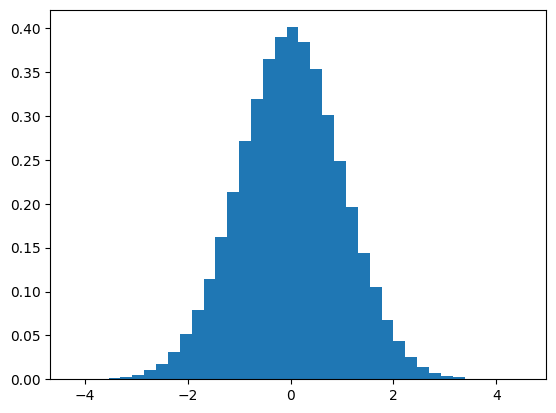

In [4]:
# Geração do gráfico do Histograma da variável aleatória x
plt.hist(x, bins=int(1+3.22*np.log(size)), density=True) # calculando a quantidade de bins
#plt.hist(x, bins=10, density=True)
plt.show()

In [5]:
# Geração de 7 números com distribuição normal de média 5 e desvio padrão 2

stats.norm.rvs(5,2,7)

array([2.35854686, 2.33563491, 4.93377405, 5.9967808 , 3.70552631,
       5.79993803, 4.02150486])

Forneça o número de amostras 
Forneça a média da distribuição 
Forneça o desvio-padrão da distribuição 
Desvio-padrão =  1.091010743916177
Valor mínimo =  -1.678547548319223
Valor média =  0.9657401616530815
Valor variância =  1.1903044433405296


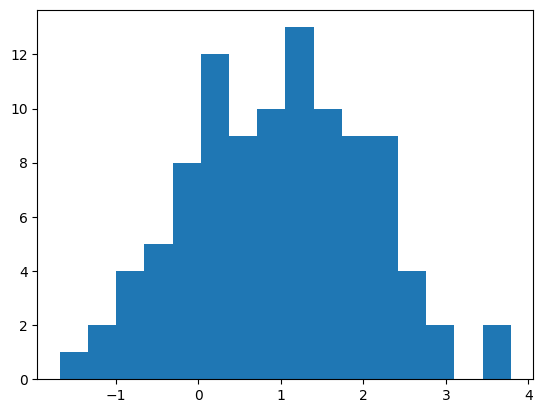

In [6]:
# Exemplo de geração e cálculo de medidas estatísticas

n = 100000
mu = 0
sigma = 10
print("Forneça o número de amostras ")
n = int(input())
print("Forneça a média da distribuição ")
mu = float(input())
print("Forneça o desvio-padrão da distribuição ")
sigma = float(input())

x = stats.norm.rvs(mu,sigma,n)
print("Desvio-padrão = " , x.std())
minimo = x.min()
print("Valor mínimo = ", minimo)
media = x.mean()
print("Valor média = ", media)
var = x.var()
print("Valor variância = ", var)

plt.hist(x, bins=int(round(1 + 3.22*np.log(n))))
plt.show()

## 1.1. Distribuições como Classes

- Lembrete: Python é uma linguagem orientada a objetos
- As distribuições são implementadas como classes.
- Essas classes possuem um conjunto de métodos com mesma assinatura.
- O pacote stats do SciPy implementa as principais distribuições estatísticas com os respectivos métodos.

Site da API da distribuições no Scipy: https://docs.scipy.org/doc/scipy/reference/stats.html
    


### Métodos Básicos para Distribuições Contínuas
Os principais métodos disponíveis para as distribuições são os seguintes:

    - rvs(loc=0, scale=1, size=1, random_state=None)    ---> geram números randômicos
    - pdf(x, loc=0, scale=1)                            ---> gera a função densidade de probabilidade
    - cdf(x, loc=0, scale=1)                            ---> gera a função cumulativa de probabilidade
    - ppf(q, loc=0, scale=1)                            ---> gera a função percentil, inversa da função cdf


### Métodos para Cálculo de Métricas Estatísticas
    - median(loc=0, scale=1) 	      ---> fornece a Mediana da distribuição.
    - mean(loc=0, scale=1) 	        ---> fornece a média da distribuição.
    - var(loc=0, scale=1) 	         ---> fornece a Variancia da distribuição.
    - std(loc=0, scale=1) 	         ---> fornece o Desvio Padrão da distribuição.

In [7]:
print('Obtém a média de uma distribuição normal com média zero e desvio padrão 1')
stats.norm.mean(0,1)

Obtém a média de uma distribuição normal com média zero e desvio padrão 1


np.float64(0.0)

In [8]:
print('Obtém o desvio-padrão de uma distribuição normal com média zero e desvio padrão 1')
stats.norm.std(0,1)

Obtém o desvio-padrão de uma distribuição normal com média zero e desvio padrão 1


np.float64(1.0)

In [9]:
# A distribuição é um objeto Scipy

dist1 = stats.norm(5,2)
dist1.mean()

np.float64(5.0)

In [10]:
print("Nunca se esqueça que Python é uma Linguagem Orientada a Objetos")
stats.norm.rvs(0,1,100000).std()

Nunca se esqueça que Python é uma Linguagem Orientada a Objetos


np.float64(0.9969204678541501)

In [11]:
# obtenha o desvio padrão de dist2
dist2 = stats.norm(5,2)


std = dist2.std()
print(f"O desvio padrão é {std}")

O desvio padrão é 2.0


### Funções Contínuas CDF e PDF
Dad uma v.a. X, o histograma e as funções contínuas de distribuição acumulada, CDF - F(x), e a função densidade de probabilidade, PDF - f(x), são destritas pelos métodos:
- hist = np.histogram(dado_x)
- hist_dist = scipy.stats.rv_histogram(hist)
- hist_dist.pdf(X)
- hist_dist.cdf(X)

Onde:
- dado_X é um array numpy com n amostras de X.
- hist é um histograma da v.a. X (construído a partir das amostras de dado_x.



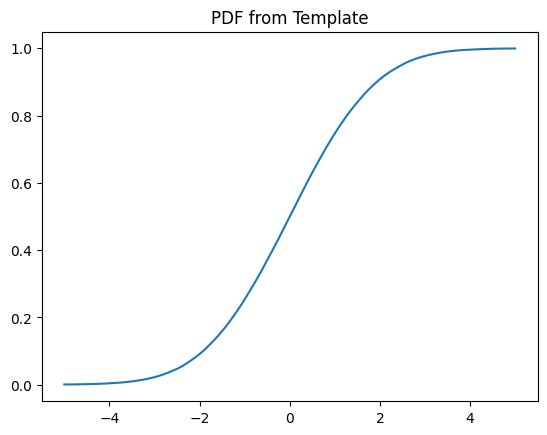

In [3]:
# Exemplo de uso de:
# - Histograma
# - Função Densidade de Probabilidade (PDF, FDP)
# - Função de Distribuição Acumulada(CDF)

import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

# Criando as amostras de data
data = scipy.stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state=123)

# Criando um histograma a partir de data
hist = np.histogram(data, bins=100)

# Criando distribuição contínua a partir de um histograma
hist_dist = scipy.stats.rv_histogram(hist)

# Geração dos gráficos
X = np.linspace(-5.0, 5.0, 100)
plt.title("PDF from Template")
# plt.hist(data, density=True, bins=100)
# plt.plot(X, hist_dist.pdf(X), label='PDF')
plt.plot(X, hist_dist.cdf(X), label='CDF')
plt.show()

## 2. Distribuições Discretas

### 2.1. Distribuição Uniforme Discreta

Probability Mass Function (PMF)

$$
\begin{equation}
             \nonumber P_X(x) = \left\{
              \begin{array}{l l}
                \frac{1}{b-a} & \quad  a < x < b\\
                0 & \quad x < a \textrm{ or } x > b
              \end{array} \right.
\end{equation}
$$

$$
EX=\frac{a+b}{2} \
$$

$$
Var(X) =\frac{(b - a)^2}{12}
$$




Em Python, a distribuição uniforme discreta está no módulo scipy.stats.randint

A função de probabilidade de massa para for randint é:

$$
f(k)=\frac{1}{high-low} \ =\frac{1}{b-a} \
$$


com k = {a, a+1, ..., b-1).

Para se gerar a função de probabilidad de massa usa-se:
- randint.pmf(k, low, high, loc) ou
- randint.pmf(k - loc, low, high).

sendo loc é o incremento.

Link de referência:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html#scipy.stats.randint


In [4]:
# Obtendo a média, variância, skew e kurtose numéricos de uma distribuição uniforme discreta
import matplotlib.pyplot as plt
from scipy import stats

n = 1000
a = 1
b = 3

mean, var, skew, kurt = stats.randint.stats(a, b, moments='mvsk')
x= stats.randint.rvs(a, b, size= n)  # geração de n amostras com distribuição uniforme discreta
print("Média =", mean)
print("Média Calculada = ", x.mean())
print("Variância =", var)
print("Variância Calculada = ", x.var())
print("Skew =", skew)
print("Skew Calculada = ", stats.skew(x))
print("Kurtose =", kurt)
print("Kurtose Calculada = ", stats.kurtosis(x))



Média = 1.5
Média Calculada =  1.512
Variância = 0.25
Variância Calculada =  0.24985600000000005
Skew = 0.0
Skew Calculada =  -0.048013829974836
Kurtose = -2.0
Kurtose Calculada =  -1.9976946721311482


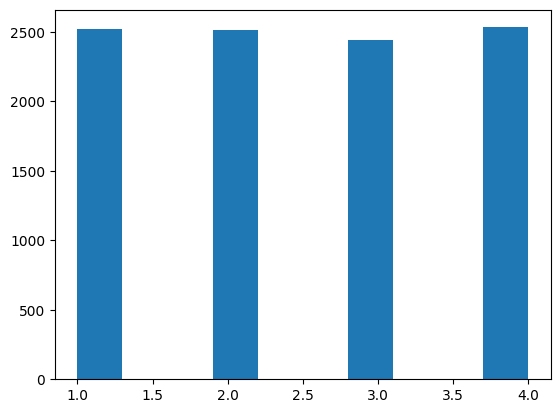

In [12]:
# Geração do historamas das amostras seguindo uma distribuição discreta uniforme
n = 10000
a = 1
b = 5
x= stats.randint.rvs(a, b, size= n)  # geração de n amostras com distribuição uniforme discreta
plt.hist(x)
plt.show()

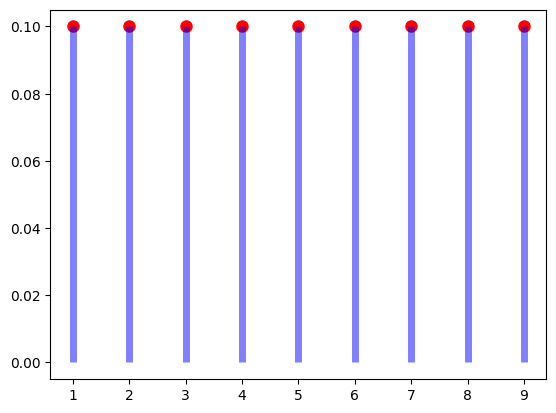

In [ ]:
# Plotando o gráfico da Função de Probabilidade de Massa
a, b = 1, 11
x2 = np.arange(stats.randint.ppf(0.001, a, b),
              stats.randint.ppf(0.999, a, b))

plt.plot(x2,stats.randint.pmf(x2, a, b), 'ro', ms=8, label='randint pmf')
plt.vlines(x2, 0, stats.randint.pmf(x2, a, b), colors='b', lw=5, alpha=0.5)
plt.show() 

### Exercício 1:
Obter a média e a variância teóricas e calculadas para uma distribuição uniforme discreta, com os seguintes parâmetros:
- n = 1000
- a = 0
- b = 1,2,...,10


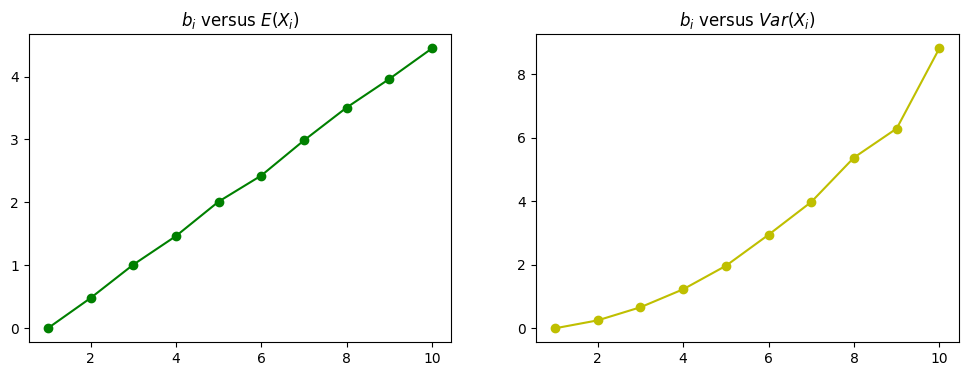

In [80]:
# Exercício 1
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

n = 1000
a = 0
b = np.array(range(1,11)) # b = np.arange(1,11)
# x = ??

# Obtenção das 10 séries de números aleatórios com ditribuição discreta uniforme
# ????
# x = stats.randint.rvs(a, b????, size = n)  # geração de n amostras com distribuição uniforme discreta
# ?????
x = [stats.randint.rvs(a, bi, size = n) for bi in b]

# Saida dos valores de médias e variâncias teórica e calculadas
# ???
x_mean_var_teo = np.array([((bi + a)/2, ((bi - a)**2)/12) for bi in b])
x_mean_var_calc = np.array([(xi.mean(), xi.var()) for xi in x])

fig, ax = plt.subplots(1, 2, figsize = (12, 4))

# Gráfico da Média Calculada em função de b[i]
# ???
ax[0].plot(b, x_mean_var_calc[:,0], 'og-')
ax[0].set_title('$b_i$ versus $E(X_i)$')

# Gráfico da Variância Calculada em função de b[i]
# ??????
ax[1].plot(b, x_mean_var_calc[:,1], 'oy-')
ax[1].set_title('$b_i$ versus $Var(X_i)$')

plt.show()

In [ ]:
# Gere o gráfico da função de probabilidade de massa de x
# ???

## 3. Distribuições Contínuas
- Distribuição Uniforme Contínua
- Distribuição Normal



### 3.1. Distribuição Uniforme Contínua

$$
\begin{equation}
             \nonumber f_X(x) = \left\{
              \begin{array}{l l}
                \frac{1}{b-a} & \quad  a < x < b\\
                0 & \quad x < a \textrm{ or } x > b
              \end{array} \right.
\end{equation}
$$

$$
EX=\frac{a+b}{2} \
$$

$$
Var(X) =\frac{(b - a)^2}{12}
$$

Em Python, a distribuição uniforme contínua está no módulo scipy.stats.uniform.

Os parâmetro são "loc" e "scale", que têm a seguinte relação com "a" e "b":

$$
loc = a
$$

$$
scale = b - a
$$

Caso seja dado a média e a variância para gerar uma distribuição uniforme, utilize a seguintes equações para converter para "loc" e "scale":

$$
scale = \sqrt{12*Var(x)}
$$

$$
loc = \frac{(2*EX - scale)}{2}
$$

As principais funções são:

 - uniform.rvs(loc=0, scale=1, size=1, random_state=None) - Gera a variável randômica
 - uniform.pdf(x, loc=0, scale=1) - Calcula a Função Densidade de Probabilidade
 - uniform.cdf(x, loc=0, scale=1) - Calcula a Função Distribuição Cumulativa
 - uniform.mean(loc=0, scale=1)   - Calcula a Média da distribuição
 - uniform.var(loc=0, scale=1)    - Calcula a variância da distribuição



In [ ]:
# Exemplo de uso da distribuição Uniforme Contínua
# loc = a, scale = (b-a)

r = stats.uniform.rvs(loc=0, scale=10, size=100000)
print('Média=%.4f' % r.mean())
print('Variância=%.4f' % r.var())

plt.hist(r, bins=20, density=False, histtype='stepfilled', alpha=0.2)
plt.title('Uniform(0,10)')
plt.ylabel('Frequência')
plt.xlabel('Random Variable')
plt.xlim(-5, 15)
plt.show()

plt.hist(r, bins=20, density=True, histtype='stepfilled', alpha=0.2)
#plt.title('Uniform(0,10)')
#plt.ylabel('Frequência - Normalizada')
#plt.xlabel('Random Variable')
#plt.xlim(-5, 15)
#plt.show()

x = np.linspace(-5.0, 15.0, 100000)
y = stats.uniform.pdf(x, loc=0, scale=10.0)
plt.plot(x,y, 'r-', lw=3, alpha=0.6)
plt.title('Uniform(0,10)')
plt.ylabel('PDF & Freq. Normalizada')
plt.xlabel('Random Variable')
plt.xlim(-5, 15)
# plot a CDF em azul

plt.show()

### Exercício 2:
Escreva um programa que dado Y = c.$X^{2}$ , obtenha o histograma a a fdp de f(Y), sendo que X é uma variável aleatória uniformemente distribuída entre 0 e 1. Teste o programa para c=1,2,3,4 e 5, e compare com os respectivos f(Y) teóricos. Analise como se comportam E[X], E[Y], Var(X) e Var(Y) em função da constante c.

In [ ]:
# Exercício 2

????

### 3.2. Distribuição Normal

$$
f_X(x) = \frac{e^{-{0.5(\frac{x-\mu}{\sigma})}^2}}{\sigma\sqrt{2\pi}}              
$$

$$
E[X]=\mu\
$$

$$
Var(X) =\sigma^2
$$

Link para o site do Scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
# Utilizando o pacote Stats do Scipy

# geração de n números randômicos com distribuição normal padrão
n = 10000
r = stats.norm.rvs(size=n)

# plot o histograma de r
#???

plt.hist(r, bins=20)
plt.show

In [ ]:
# loc = mu = média
# scale = sigma = desvio padrão

mu = 0
sigma = 1

r = stats.norm.rvs(loc=mu, scale=sigma, size=100000)
print('Média=%.4f' % r.mean())
print('Variância=%.4f' % r.var())

plt.hist(r, bins=20, density=False, histtype='stepfilled', alpha=0.2)
plt.title('Distribuição Normal')
plt.ylabel('Frequência')
plt.xlabel('Random Variable')
plt.show()

In [ ]:

x = np.linspace(-4.0, 4.0, 100000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x,y, 'r-', lw=3, alpha=0.6)
plt.hist(r, bins=20, density=True, histtype='stepfilled', alpha=0.2)
plt.title('Distribuição Normal')
plt.ylabel('PDF')
plt.xlabel('Random Variable')
plt.show()

In [ ]:
# Gerando a CDF da distribuição exponencial
x = np.linspace(-2.0, 6.0, 100)
ya = stats.expon.cdf(x, loc=mu, scale=sigma)
plt.plot(x,ya, '.', lw=3, alpha=0.6)
plt.title('Distribuição Normal Acumulada')
plt.ylabel('CDF')
plt.xlabel('Random Variable')
plt.show()

In [ ]:
stats.norm.ppf(0.5, loc=mu, scale=sigma)

In [ ]:
# Exemplo de uso de objeto distribuição Normal

# Importação de Pacotes
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mu =0
sigma = 1
x = np.linspace(-4.0, 4.0, 100)

dist3 = stats.norm(loc=mu, scale=sigma) # geração do objeto distrbribuição Normal com média mu e desvio padrão sigma
print(dist3.cdf(0))
print(dist3.rvs(3))
print(dist3.ppf(.5))
plt.plot(x,dist3.pdf(x))
plt.show()


In [ ]:
# Obtenha o valor da área da pdf para -sigma < x < sigma
mu = 0
sigma = 1
std = 1
area1 = stats.norm.cdf(-std, loc=mu, scale=sigma)
area2 = stats.norm.cdf(std, loc=mu, scale=sigma)
print(area1)
print(area2)
print(area2 - area1)

### Exercício 3:
Dado duas v.a. X, com ditribuição uniforme, e Y, com distribuição Normal.
- Determine os parâ dessas v.a.
- Gere n amostras para cada distribuição.
- Obtenha a média, variância, skew(‘s’) e kurtosis(‘k’) das duas distribuições.
- Obtenha os gráficos dos histogramas, PDF e CDF para as duas distribuições.


In [ ]:
# Exercício 3:

# Importação do Pacote
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Definição do números de amostras e dos parâmetros das distribuiçòes uniforme e Normal.
n = 10000  # Número de amostras
a = 0      # parâmetro da distribuição uniforme
b = 11     # parâmetro da distribuição uniforme
# loc = a, scale = (b-a)

mu = 5     # média da distribuição Normal
sigma = 2  # desvio-padrão da distribuição Normal


# Geração dos n amostras das duas distribuições

uniforme = stats.uniform.rvs(loc=0, scale=10, size=n)
normal = stats.norm.rvs(loc=mu, scale=sigma, size=n)

# Obtenção das médias, variâncias, skews e kurtoses das duas v.a.

???

# Obtenção dos gráficos de histograma, PDF e CDF das duas v.a.
???

### Exercício 4:
O teste de QI (Quociente de Inteligência) foi concebido para modelar uma distribuição Normal com médico 100 e desvio padrão igual a 15.
- Escreva um programa para determinar a probabilidade de uma pessoal ter QI maior que 115.
- Escreva um programa para determinar a probabilidade de uma pessoa ter QI entre 115 e 130.

In [ ]:
# Exercício 4 - Calculo de probabilidade sobre o teste de QI

# Parâmetros da distribuição do teste de QI
mu = 100
sigma = 15

1-stats.norm.cdf(115,loc=mu, scale=sigma)

# Determinação da distribuição de QI
#????

# Cálculo da pergunta 1
# ?????

# Cálculo da pergunta 2
 #?????



### Exercício 5:
Uma grande empresa faz uso de milhares de lâmpadas elétricas que permanecem acessas continuamente. A vida de uma lâmpada pode ser considerada com um variável aleatória com distribuição normal, com vida média de 50 dias e desvio-padrão de 15 dias. Se no primeiro de agosto foram instaladas 8000 lâmpadas novas, aproximadamente quantas lâmpadas deverão ser substituídas no dia primeiro de setembro?
- Escreva um programa para resolver esse problema.
- Resposta: 816 lâmpadas.

In [ ]:
# Exercício 5 - Calculo de lâmpadas a serem trocadas

# Parâmetros da distribuição da vida das lâmpadas
mu = 50
sigma = 15

# Determinação da distribuição de tempo de vida das lâmpadas
????

# Cálculo da pergunta
 ?????

